In [4]:
import torchvision
import torchvision.transforms as transforms 
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_set = torchvision.datasets.FashionMNIST(root = ".", train = True, download = True, transform = transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train = False, download = True, transform = transforms.ToTensor())

training_loader = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle = False)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 32, shuffle = False)

torch.manual_seed(0)

# If you are using CuDNN, otherwise you can just ignore
torch.backends.cudnn.deterministic = True 
torch.backends.cudnn.benchmark = False

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [5]:
#modify from lab7 solution
class MyCNN(nn.Module):
  '''
  CNN with activation function of ReLU
  '''
  def __init__(self):
    super(MyCNN, self).__init__()
    conv1 = nn.Conv2d(1, 32, kernel_size = 5)
    nn.init.xavier_uniform_(conv1.weight)
    self.cnn_model = nn.Sequential(conv1, nn.ReLU(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.ReLU(), nn.MaxPool2d(2, stride = 2))
    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU(), nn.Linear(1024, 256), nn.ReLU(), nn.Linear(256,10))

  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x

class MyCNN2(nn.Module):
  '''
  CNN with activation function of Tanh
  '''
  def __init__(self):
    super(MyCNN2, self).__init__()
    conv1 = nn.Conv2d(1, 32, kernel_size = 5)
    nn.init.xavier_uniform_(conv1.weight)
    self.cnn_model = nn.Sequential(conv1, nn.Tanh(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.Tanh(), nn.MaxPool2d(2, stride = 2))
    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), nn.Tanh(),nn.Linear(1024, 256), nn.Tanh(), nn.Linear(256,10))

  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x

class MyCNN3(nn.Module):
  '''
  CNN with activation function of Sigmoid
  '''
  def __init__(self):
    super(MyCNN3, self).__init__()
    conv1 = nn.Conv2d(1, 32, kernel_size = 5)
    nn.init.xavier_uniform_(conv1.weight)
    self.cnn_model = nn.Sequential(conv1, nn.Sigmoid(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.Sigmoid(), nn.MaxPool2d(2, stride = 2))
    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), nn.Sigmoid(), nn.Linear(1024, 256), nn.Sigmoid(), nn.Linear(256,10))

  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x

class MyCNN4(nn.Module):
  '''
  CNN with activation function of ELU
  '''
  def __init__(self):
    super(MyCNN4, self).__init__()
    conv1 = nn.Conv2d(1, 32, kernel_size = 5)
    nn.init.xavier_uniform_(conv1.weight)
    self.cnn_model = nn.Sequential(conv1, nn.ELU(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.ELU(), nn.MaxPool2d(2, stride = 2))
    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), nn.ELU(),nn.Linear(1024, 256), nn.ELU(), nn.Linear(256,10))

  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x

In [10]:
device = torch.device("cuda:0")

net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.parameters(),lr=0.1)

In [6]:
# Borrow from lab7 solution
def evaluation(dataloader):
  total, correct = 0,0
  net.eval()
  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

def train_process(max_epochs):
    loss_epoch_array = []
    loss_epoch = 0
    train_accuracy = []
    valid_accuracy = []
    for epoch in range(max_epochs):
      loss_epoch = 0
      for i, data in enumerate(training_loader, 0):
        net.train()
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        loss_epoch += loss.item()
      loss_epoch_array.append(loss_epoch)
      train_accuracy.append(evaluation(training_loader))
      valid_accuracy.append(evaluation(test_loader))
      print("Epoch {}: loss: {}, train accuracy: {}, valid accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], valid_accuracy[-1]))
    plt.plot(train_accuracy, label='train_accuracy')
    plt.plot(valid_accuracy, label='valid_accuracy')
    plt.legend()
    plt.show()

Epoch 1: loss: 1282.516882583499, train accuracy: 85.59, valid accuracy:84.64
Epoch 2: loss: 675.7110814452171, train accuracy: 88.89833333333333, valid accuracy:87.42
Epoch 3: loss: 565.3769611828029, train accuracy: 90.27333333333333, valid accuracy:88.67
Epoch 4: loss: 497.70330987870693, train accuracy: 91.16833333333334, valid accuracy:89.41
Epoch 5: loss: 443.2774943020195, train accuracy: 91.60833333333333, valid accuracy:89.38
Epoch 6: loss: 396.76136222295463, train accuracy: 91.57166666666667, valid accuracy:89.29
Epoch 7: loss: 353.0283010583371, train accuracy: 91.99333333333334, valid accuracy:89.4
Epoch 8: loss: 312.4194449810311, train accuracy: 92.64333333333333, valid accuracy:89.6
Epoch 9: loss: 276.62345683248714, train accuracy: 93.26666666666667, valid accuracy:89.71
Epoch 10: loss: 252.9852971113287, train accuracy: 93.04666666666667, valid accuracy:89.35
Epoch 11: loss: 229.09854393918067, train accuracy: 92.90166666666667, valid accuracy:88.83
Epoch 12: loss: 21

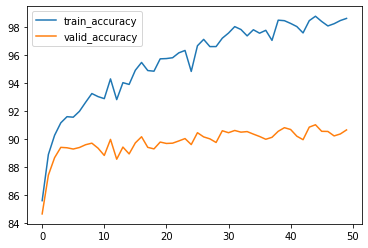

In [6]:
train_process(50)

Epoch 1: loss: 1062.9617444723845, train accuracy: 85.88833333333334, valid accuracy:84.73
Epoch 2: loss: 661.4840368106961, train accuracy: 88.92666666666666, valid accuracy:87.54
Epoch 3: loss: 562.7993115782738, train accuracy: 90.43333333333334, valid accuracy:88.92
Epoch 4: loss: 497.64657796919346, train accuracy: 91.355, valid accuracy:89.47
Epoch 5: loss: 446.27522136829793, train accuracy: 92.105, valid accuracy:90.04
Epoch 6: loss: 401.876898964867, train accuracy: 92.625, valid accuracy:90.08
Epoch 7: loss: 361.7280490389094, train accuracy: 93.34833333333333, valid accuracy:90.3
Epoch 8: loss: 322.8082721149549, train accuracy: 93.88166666666666, valid accuracy:90.67
Epoch 9: loss: 285.7117509697564, train accuracy: 94.165, valid accuracy:90.35
Epoch 10: loss: 251.0792707791552, train accuracy: 94.53166666666667, valid accuracy:90.64
Epoch 11: loss: 221.16428957367316, train accuracy: 94.63666666666667, valid accuracy:90.37
Epoch 12: loss: 194.9557560547255, train accuracy:

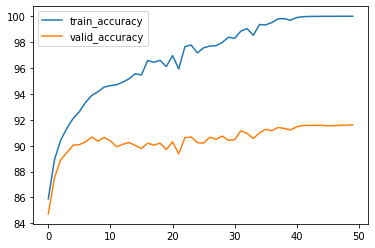

In [7]:
net = MyCNN2().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.parameters(),lr=0.1)
train_process(50)

Epoch 1: loss: 4334.347099781036, train accuracy: 10.0, valid accuracy:10.0
Epoch 2: loss: 4320.2778124809265, train accuracy: 10.0, valid accuracy:10.0
Epoch 3: loss: 4319.551692247391, train accuracy: 10.0, valid accuracy:10.0
Epoch 4: loss: 4319.3007028102875, train accuracy: 10.0, valid accuracy:10.0
Epoch 5: loss: 4319.176539182663, train accuracy: 10.0, valid accuracy:10.0
Epoch 6: loss: 4319.103482723236, train accuracy: 10.0, valid accuracy:10.0
Epoch 7: loss: 4319.055767536163, train accuracy: 10.0, valid accuracy:10.0
Epoch 8: loss: 4319.022245883942, train accuracy: 10.0, valid accuracy:10.0
Epoch 9: loss: 4318.997399091721, train accuracy: 10.0, valid accuracy:10.0
Epoch 10: loss: 4318.978132486343, train accuracy: 10.0, valid accuracy:10.0
Epoch 11: loss: 4318.962591171265, train accuracy: 10.0, valid accuracy:10.0
Epoch 12: loss: 4318.949572086334, train accuracy: 10.0, valid accuracy:10.0
Epoch 13: loss: 4318.938205003738, train accuracy: 10.0, valid accuracy:10.0
Epoch 

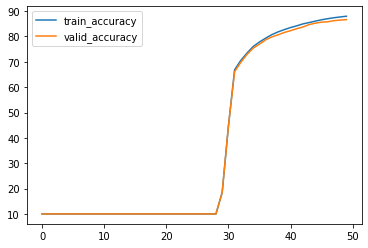

In [14]:
net = MyCNN3().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.parameters(),lr=0.1)
train_process(50)

Epoch 1: loss: 1051.531417235732, train accuracy: 85.82166666666667, valid accuracy:84.47
Epoch 2: loss: 657.2412004172802, train accuracy: 88.68833333333333, valid accuracy:87.27
Epoch 3: loss: 562.7194898873568, train accuracy: 90.02333333333333, valid accuracy:88.52
Epoch 4: loss: 502.786084651947, train accuracy: 90.89166666666667, valid accuracy:89.2
Epoch 5: loss: 454.62325399369, train accuracy: 91.68666666666667, valid accuracy:89.48
Epoch 6: loss: 412.62954851798713, train accuracy: 92.18333333333334, valid accuracy:89.51
Epoch 7: loss: 375.3497582646087, train accuracy: 92.80166666666666, valid accuracy:89.8
Epoch 8: loss: 340.42560212220997, train accuracy: 93.20333333333333, valid accuracy:89.89
Epoch 9: loss: 310.5466645555571, train accuracy: 93.65833333333333, valid accuracy:90.01
Epoch 10: loss: 282.3356789855752, train accuracy: 93.51666666666667, valid accuracy:89.58
Epoch 11: loss: 259.4610933349468, train accuracy: 93.54333333333334, valid accuracy:89.23
Epoch 12: l

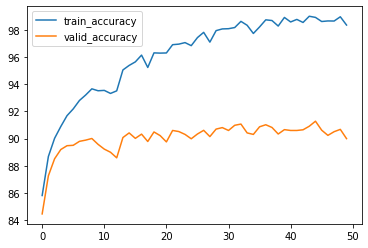

In [9]:
net = MyCNN4().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.parameters(),lr=0.1)
train_process(50)

Epoch 1: loss: 4311.851074695587, train accuracy: 10.19, valid accuracy:10.16
Epoch 2: loss: 4294.2803366184235, train accuracy: 21.246666666666666, valid accuracy:20.94
Epoch 3: loss: 4221.669325590134, train accuracy: 28.606666666666666, valid accuracy:28.62
Epoch 4: loss: 3259.559272944927, train accuracy: 60.10666666666667, valid accuracy:59.78
Epoch 5: loss: 1885.8917296528816, train accuracy: 65.68, valid accuracy:64.63
Epoch 6: loss: 1665.0020015239716, train accuracy: 68.78333333333333, valid accuracy:68.2
Epoch 7: loss: 1536.7380222082138, train accuracy: 71.23166666666667, valid accuracy:70.46
Epoch 8: loss: 1438.8673402071, train accuracy: 72.83, valid accuracy:71.9
Epoch 9: loss: 1367.5933233201504, train accuracy: 73.86, valid accuracy:73.22
Epoch 10: loss: 1317.8809511065483, train accuracy: 74.45, valid accuracy:73.8
Epoch 11: loss: 1280.1055510938168, train accuracy: 75.14833333333333, valid accuracy:74.4
Epoch 12: loss: 1247.8516809344292, train accuracy: 75.6533333333

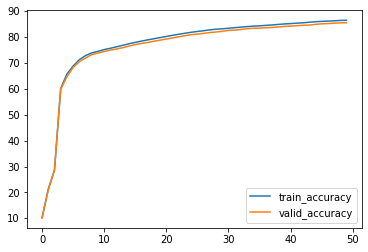

In [10]:
net = MyCNN().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.parameters(),lr=0.001)
train_process(50)

Epoch 1: loss: 616002.0645058751, train accuracy: 10.0, valid accuracy:10.0
Epoch 2: loss: 4323.850650072098, train accuracy: 10.0, valid accuracy:10.0
Epoch 3: loss: 4323.850651502609, train accuracy: 10.0, valid accuracy:10.0
Epoch 4: loss: 4323.850651502609, train accuracy: 10.0, valid accuracy:10.0
Epoch 5: loss: 4323.850651502609, train accuracy: 10.0, valid accuracy:10.0
Epoch 6: loss: 4323.850651502609, train accuracy: 10.0, valid accuracy:10.0
Epoch 7: loss: 4323.850651502609, train accuracy: 10.0, valid accuracy:10.0
Epoch 8: loss: 4323.850651502609, train accuracy: 10.0, valid accuracy:10.0
Epoch 9: loss: 4323.850651502609, train accuracy: 10.0, valid accuracy:10.0
Epoch 10: loss: 4323.850651502609, train accuracy: 10.0, valid accuracy:10.0
Epoch 11: loss: 4323.850651502609, train accuracy: 10.0, valid accuracy:10.0
Epoch 12: loss: 4323.850651502609, train accuracy: 10.0, valid accuracy:10.0
Epoch 13: loss: 4323.850651502609, train accuracy: 10.0, valid accuracy:10.0
Epoch 14

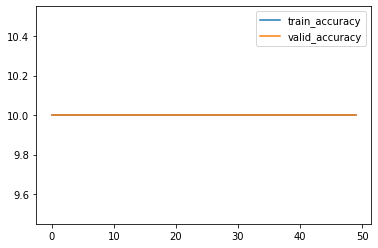

In [11]:
opt = torch.optim.SGD(net.parameters(),lr=0.5)
train_process(50)

Epoch 1: loss: 4330.547361373901, train accuracy: 10.0, valid accuracy:10.0
Epoch 2: loss: 4330.5616228580475, train accuracy: 10.0, valid accuracy:10.0
Epoch 3: loss: 4330.5616228580475, train accuracy: 10.0, valid accuracy:10.0
Epoch 4: loss: 4330.5616228580475, train accuracy: 10.0, valid accuracy:10.0
Epoch 5: loss: 4330.5616228580475, train accuracy: 10.0, valid accuracy:10.0
Epoch 6: loss: 4330.5616228580475, train accuracy: 10.0, valid accuracy:10.0
Epoch 7: loss: 4330.5616228580475, train accuracy: 10.0, valid accuracy:10.0
Epoch 8: loss: 4330.561622619629, train accuracy: 10.0, valid accuracy:10.0
Epoch 9: loss: 4330.561622619629, train accuracy: 10.0, valid accuracy:10.0
Epoch 10: loss: 4330.561622619629, train accuracy: 10.0, valid accuracy:10.0
Epoch 11: loss: 4330.561622619629, train accuracy: 10.0, valid accuracy:10.0
Epoch 12: loss: 4330.561622619629, train accuracy: 10.0, valid accuracy:10.0
Epoch 13: loss: 4330.561622619629, train accuracy: 10.0, valid accuracy:10.0
Ep

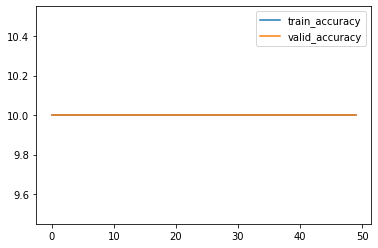

In [12]:
opt = torch.optim.SGD(net.parameters(),lr=1)
train_process(50)

Epoch 1: loss: 4636.172187566757, train accuracy: 10.0, valid accuracy:10.0
Epoch 2: loss: 4636.225288629532, train accuracy: 10.0, valid accuracy:10.0
Epoch 3: loss: 4636.225288629532, train accuracy: 10.0, valid accuracy:10.0
Epoch 4: loss: 4636.225288629532, train accuracy: 10.0, valid accuracy:10.0
Epoch 5: loss: 4636.225288629532, train accuracy: 10.0, valid accuracy:10.0
Epoch 6: loss: 4636.225288629532, train accuracy: 10.0, valid accuracy:10.0
Epoch 7: loss: 4636.225288629532, train accuracy: 10.0, valid accuracy:10.0
Epoch 8: loss: 4636.225288629532, train accuracy: 10.0, valid accuracy:10.0
Epoch 9: loss: 4636.225288629532, train accuracy: 10.0, valid accuracy:10.0
Epoch 10: loss: 4636.225288629532, train accuracy: 10.0, valid accuracy:10.0
Epoch 11: loss: 4636.225288629532, train accuracy: 10.0, valid accuracy:10.0
Epoch 12: loss: 4636.225290060043, train accuracy: 10.0, valid accuracy:10.0
Epoch 13: loss: 4636.2252814769745, train accuracy: 10.0, valid accuracy:10.0
Epoch 1

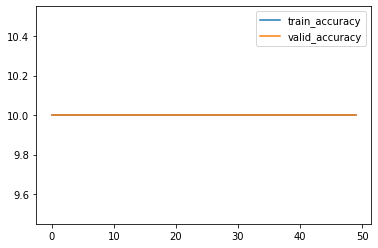

In [13]:
opt = torch.optim.SGD(net.parameters(),lr=10)
train_process(50)

In [14]:
class MyCNN5(nn.Module):
  def __init__(self):
    super(MyCNN5, self).__init__()
    conv1 = nn.Conv2d(1, 32, kernel_size = 5)
    nn.init.xavier_uniform_(conv1.weight)
    self.cnn_model = nn.Sequential(conv1, nn.ReLU(), nn.MaxPool2d(2, stride=2), nn.Conv2d(32, 64, kernel_size = 5), nn.ReLU(), nn.MaxPool2d(2, stride = 2))
    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), nn.ReLU(), nn.Linear(1024, 256), nn.Dropout(0.9), nn.ReLU(), nn.Linear(256,10))

  def forward(self, x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x

Epoch 1: loss: 1293.9752735942602, train accuracy: 85.40166666666667, valid accuracy:84.45
Epoch 2: loss: 698.6285137683153, train accuracy: 88.70666666666666, valid accuracy:87.45
Epoch 3: loss: 579.8067399784923, train accuracy: 89.73166666666667, valid accuracy:88.69
Epoch 4: loss: 514.2577083408833, train accuracy: 90.91833333333334, valid accuracy:89.52
Epoch 5: loss: 464.1691503729671, train accuracy: 91.36, valid accuracy:89.41
Epoch 6: loss: 421.24278390593827, train accuracy: 91.82333333333334, valid accuracy:89.81
Epoch 7: loss: 379.666138920933, train accuracy: 92.67333333333333, valid accuracy:89.78
Epoch 8: loss: 346.9513582866639, train accuracy: 93.02166666666666, valid accuracy:90.11
Epoch 9: loss: 320.98119588941336, train accuracy: 92.5, valid accuracy:89.55
Epoch 10: loss: 287.8586905207485, train accuracy: 93.37333333333333, valid accuracy:89.96
Epoch 11: loss: 263.4265409791842, train accuracy: 93.59666666666666, valid accuracy:89.78
Epoch 12: loss: 243.88173224311

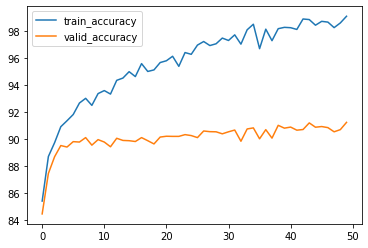

In [20]:
net = MyCNN5().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.parameters(),lr=0.1)
train_process(50)

Epoch 1: loss: 1370.5334229916334, train accuracy: 85.635, valid accuracy:84.98
Epoch 2: loss: 741.2536888420582, train accuracy: 88.41666666666667, valid accuracy:87.41
Epoch 3: loss: 617.4319757670164, train accuracy: 89.98, valid accuracy:88.33
Epoch 4: loss: 547.6921740323305, train accuracy: 90.91166666666666, valid accuracy:89.36
Epoch 5: loss: 496.34922803752124, train accuracy: 91.685, valid accuracy:89.55
Epoch 6: loss: 450.17636996041983, train accuracy: 92.15, valid accuracy:89.94
Epoch 7: loss: 414.00212156493217, train accuracy: 92.94333333333333, valid accuracy:90.25
Epoch 8: loss: 374.06848874595016, train accuracy: 93.44, valid accuracy:90.26
Epoch 9: loss: 342.49416729807854, train accuracy: 93.61333333333333, valid accuracy:90.32
Epoch 10: loss: 315.7976118531078, train accuracy: 93.89166666666667, valid accuracy:90.1
Epoch 11: loss: 285.5856130141765, train accuracy: 94.55833333333334, valid accuracy:90.16
Epoch 12: loss: 270.61588838370517, train accuracy: 94.765, v

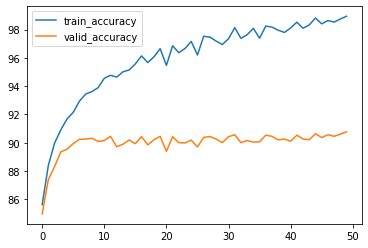

In [11]:
net = MyCNN5().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.parameters(),lr=0.1)
train_process(50)

Epoch 1: loss: 1317.7314171046019, train accuracy: 84.78333333333333, valid accuracy:83.45
Epoch 2: loss: 701.2163713090122, train accuracy: 88.205, valid accuracy:86.9
Epoch 3: loss: 583.7058828398585, train accuracy: 89.73166666666667, valid accuracy:87.98
Epoch 4: loss: 514.8440963178873, train accuracy: 90.70333333333333, valid accuracy:88.89
Epoch 5: loss: 460.5785522740334, train accuracy: 91.30166666666666, valid accuracy:89.29
Epoch 6: loss: 415.24023365974426, train accuracy: 91.66, valid accuracy:89.35
Epoch 7: loss: 374.401996973902, train accuracy: 92.37333333333333, valid accuracy:89.93
Epoch 8: loss: 335.4711321974173, train accuracy: 92.475, valid accuracy:89.72
Epoch 9: loss: 301.76040098816156, train accuracy: 93.34166666666667, valid accuracy:90.23
Epoch 10: loss: 275.32099993433803, train accuracy: 92.87666666666667, valid accuracy:89.64
Epoch 11: loss: 246.2560627600178, train accuracy: 93.64166666666667, valid accuracy:90.08
Epoch 12: loss: 228.6150934342295, train

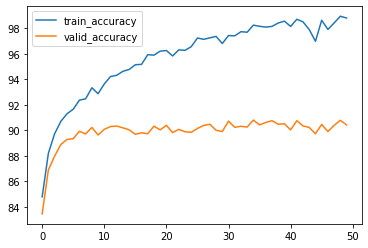

In [13]:
net = MyCNN5().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.parameters(),lr=0.1)
train_process(50)

Epoch 1: loss: 1778.0119505226612, train accuracy: 82.585, valid accuracy:81.82
Epoch 2: loss: 1001.9172074049711, train accuracy: 87.77, valid accuracy:86.63
Epoch 3: loss: 841.794490724802, train accuracy: 88.32666666666667, valid accuracy:87.06
Epoch 4: loss: 761.4033948108554, train accuracy: 89.57666666666667, valid accuracy:88.11
Epoch 5: loss: 709.1596407964826, train accuracy: 90.68833333333333, valid accuracy:88.94
Epoch 6: loss: 671.131176058203, train accuracy: 91.04833333333333, valid accuracy:88.99
Epoch 7: loss: 617.911280810833, train accuracy: 91.52, valid accuracy:89.57
Epoch 8: loss: 591.9310819413513, train accuracy: 91.145, valid accuracy:89.06
Epoch 9: loss: 563.9674495533109, train accuracy: 91.49666666666667, valid accuracy:89.11
Epoch 10: loss: 544.1661089835688, train accuracy: 92.89333333333333, valid accuracy:90.28
Epoch 11: loss: 531.1708248071373, train accuracy: 92.71, valid accuracy:90.32
Epoch 12: loss: 510.1271764691919, train accuracy: 92.75, valid acc

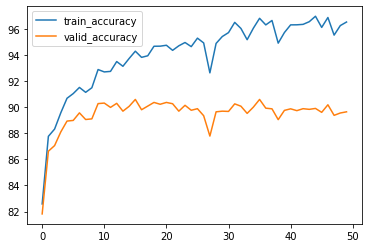

In [15]:
net = MyCNN5().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.parameters(),lr=0.1)
train_process(50)